## Resumen 

La información con la se trabaja en este _Jupiter_, proviene de un dataframe limpiado y reducido con el nombre de *info_reducida_2022_limpia.csv* y tiene algunas columnas del dataframe original ( **estudiantes_matriculados-2022_recursos.xlsx** ) que se encuentra en el directorio *raw* que debemos operar para iniciar los análisis.

El dataframe reducido contiene los siguientes _atributos_ (columnas):

- INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)    
- PROGRAMA ACADÉMICO                         
- NIVEL ACADÉMICO                            
- ÁREA DE CONOCIMIENTO                       
- DEPARTAMENTO DE OFERTA DEL PROGRAMA        
- MUNICIPIO DE OFERTA DEL PROGRAMA           
- SEXO                                       
- SEMESTRE                                   
- MATRICULADOS   




## Forma de agrupar por una columna y sumar por otra

Para poder iniciar con el primer **Análisis General de Demanda** , se necesita agrupar todas los registros por el atributo **Institución de educación superior** y sumar sus **matrículados**.

Para agrupar y sumar los registros de un dataframe en Python, usa el método ._groupby()_ de Pandas, especificando la columna por la que deseas agrupar, y luego aplica el método _.sum()_ para obtener la suma de las columnas numéricas.

Por ejemplo:
```
df.groupby('columna_a_agrupar')['columna_a_sumar'].sum()
```

Para nuestro caso, el comandos se configura así:
```
df_sin_duplicados.groupby('INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)')['MATRICULADOS'].sum()
```

Probemos...

In [ ]:
# Separando por algunos departamentos del suroeste
valores_seleccionados=['Valle del Cauca','Cauca','Nariño','Huila'] # creando lista de separación
# creo un data frame hijo de un data frame padre que solo contiene la inforación de los departamentos seleccionados
df_suroeste = df_sin_duplicados[df_sin_duplicados['DEPARTAMENTO DE OFERTA DEL PROGRAMA'].isin(valores_seleccionados)]
# Creo una lista con los valores de las sumas de matrículas por IES
df_suma_matriculas_IES = df_suroeste.groupby('INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)')['MATRICULADOS'].sum()
# Veamos las 10 universidades con mayor número de matriculas en 2022.
print(df_suma_matriculas_IES.sort_values(ascending=False).head(20))
# el dataframe por ser dataframe tiene varias propiedades.
# Una es 'sort' que organiza la información, la otra es 'head' que selecciona los primeros datos.
print("\nSeparando solo la información de registro de matriculas de solo POSGRADOS\n")
# Separando por nivel académico [solo maestría]
df_so_maestria = df_suroeste[df_suroeste['NIVEL ACADÉMICO'].isin(['POSGRADO'])]
# Creo una lista con los valores de las sumas de matrículas por IES
df_suma_so_maestrias = df_so_maestria.groupby('INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)')['MATRICULADOS'].sum()
print(df_suma_so_maestrias.sort_values(ascending=False).head(20))

INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)
SERVICIO NACIONAL DE APRENDIZAJE-SENA-                  78485
UNIVERSIDAD DEL VALLE                                   67701
UNIVERSIDAD SANTIAGO DE CALI                            42868
UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD         41984
UNIVERSIDAD DEL CAUCA                                   35478
UNIVERSIDAD DE NARIÑO                                   31621
UNIVERSIDAD SURCOLOMBIANA                               29180
INSTITUCION UNIVERSITARIA ANTONIO JOSE CAMACHO          23258
UNIVERSIDAD AUTONOMA DE OCCIDENTE                       17098
PONTIFICIA UNIVERSIDAD JAVERIANA                        16600
UNIVERSIDAD ICESI                                       15744
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-    15436
UNIVERSIDAD COOPERATIVA DE COLOMBIA                     13974
FUNDACION UNIVERSITARIA DE POPAYAN                      12861
UNIVERSIDAD MARIANA                                     12365
UNIVERSIDAD CESMAG - UNICESMAG

# _Gráficas_

## Análisis General de Demanda

Para lograr el **Análisis General de Demanda** voy a generar las gráficas propuestas punto por punto como propuso Gemini. A continuación preparo y organizo la información.

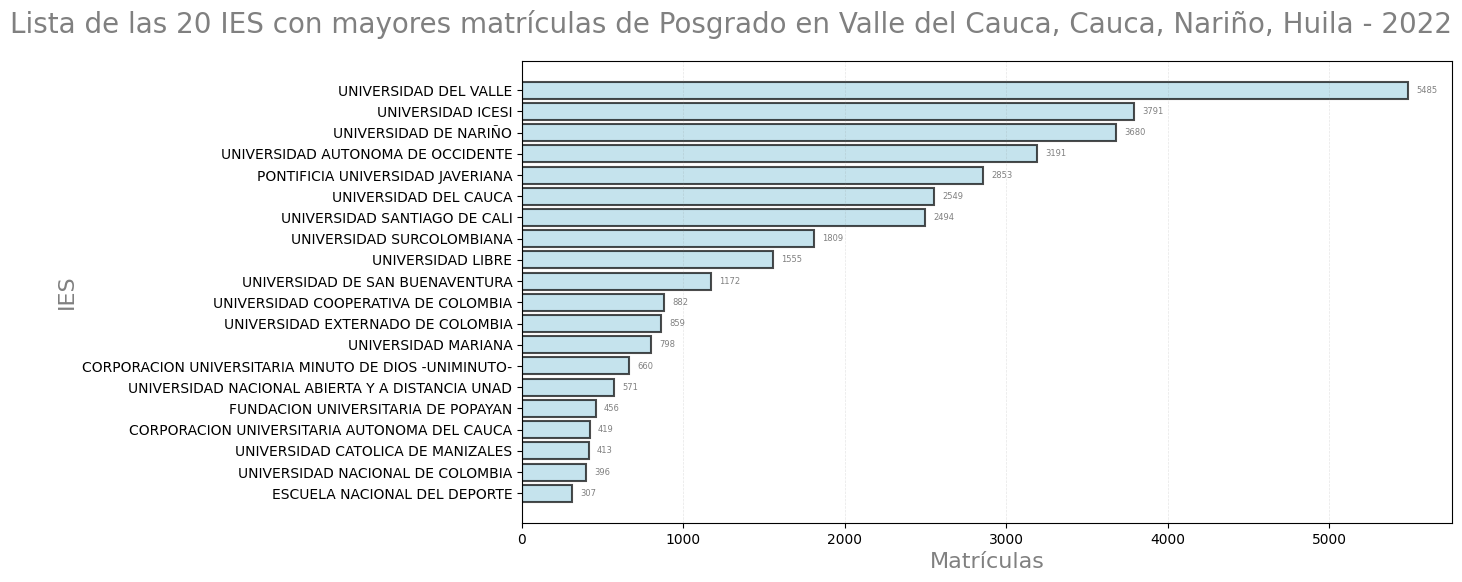

In [ ]:
# -------- Importando Matplotlib -----------------
import matplotlib.pyplot as plt # importando la librería para realizar las gráficas
# sort_values organiza | head toma los 20 primeros
lista_IES = df_suma_so_maestrias.sort_values(ascending=False).head(20)
# Separo los valores de la lista de nombres de las IES
nombres_IES = lista_IES.keys()
# print(nombres_IES) # prueba
valores_IES = lista_IES.values
# print(valores_IES) # prueba
# ******************************
# Creo objeto para crear gráfica
# ******************************
fig, ax =plt.subplots(figsize=(12, 6))# 12 inches wide, 6 inches tall
# configuración de los valores para el eje 'x' y el eje 'y', colores de las barras y grosor del delineado
hbars = ax.barh (nombres_IES, valores_IES, color='lightblue', edgecolor='black', linewidth=1.5, alpha=0.7)
# por alguna razón cambia el orden y hay que volver a cambiar el orden
ax.invert_yaxis()
# personalización de etiquetas, título, grilla y anotaciones
ax.set_xlabel('Matrículas', fontsize=16, color='grey') # detalles de etiqueta del eje 'x'
ax.set_ylabel('IES', fontsize=16, color='grey') # detalles de etiqueta del eje 'y'
ax.set_title('Lista de las 20 IES con mayores matrículas de Posgrado en Valle del Cauca, Cauca, Nariño, Huila - 2022',
             loc='right', color='grey', fontsize=20, pad=20) # detalles del título
ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.5, alpha=0.2) # detalles de grilla
# configuración de anotaciones (valores al final de las barras)
ax.bar_label(hbars,labels=[f'{e}' for e in valores_IES], color='grey', padding=6, fontsize=6)
# Presentación del objeto
plt.show()

## Organizando data frames

Continuando con el **Análisis General de Demanda**, debo crear varios data frames agrupando por _NIVEL ACADÉMICO_, _DEPARTAMENTO DE OFERTA DEL PROGRAMA_ y _MUNICIPIO DE OFERTA DEL PROGRAMA_ para luego sumar el atributo _MATRÍCULA_.

In [ ]:
# filtremos el data frame para trabajar solo con los departamentos de
df_suma_nivel_academico = df_so_maestria.groupby('NIVEL ACADÉMICO')['MATRICULADOS'].sum()
df_suma_departamento_programa = df_so_maestria.groupby('DEPARTAMENTO DE OFERTA DEL PROGRAMA')['MATRICULADOS'].sum()
df_suma_municipio_programa = df_so_maestria.groupby('MUNICIPIO DE OFERTA DEL PROGRAMA')['MATRICULADOS'].sum()
print(f"\n __Imprimiendo el data frame suma por nivel académico:__ \n {df_suma_nivel_academico.head()}")
print(f"\n __Imprimiendo el data frame suma de departamentos:__ \n {df_suma_departamento_programa.head()}")
print(f"\n __Imprimiendo el data frame suma de municipios:__ \n {df_suma_municipio_programa.head()}")


 __Imprimiendo el data frame suma por nivel académico:__ 
 NIVEL ACADÉMICO
POSGRADO    37996
Name: MATRICULADOS, dtype: int64

 __Imprimiendo el data frame suma de departamentos:__ 
 DEPARTAMENTO DE OFERTA DEL PROGRAMA
Cauca               4447
Huila               3304
Nariño              6070
Valle del Cauca    24175
Name: MATRICULADOS, dtype: int64

 __Imprimiendo el data frame suma de municipios:__ 
 MUNICIPIO DE OFERTA DEL PROGRAMA
Bolívar             1
Buenaventura       63
Cali            22774
Cartago            65
El Tambo            1
Name: MATRICULADOS, dtype: int64


**Nota**: El data frame de nivel académico solo contiene posgrados, por lo que se puede asumir que todos los matriculados del 2022 fueron un total de _37.996_ estudiantes en el nivel de **posgrados**.

Veamos como configuramos la gráfica para matriculados por departamento.
Pero, si quero ahorrar un poco de tiempo y pensandolo un poco, solo nesecito cambiar el data frame inicial, cambiar los nombre por unos mas adecuados, cuidar el _"domino de cambios"_ y tal vez, cambiar la forma de la gráfica a barras verticales.  

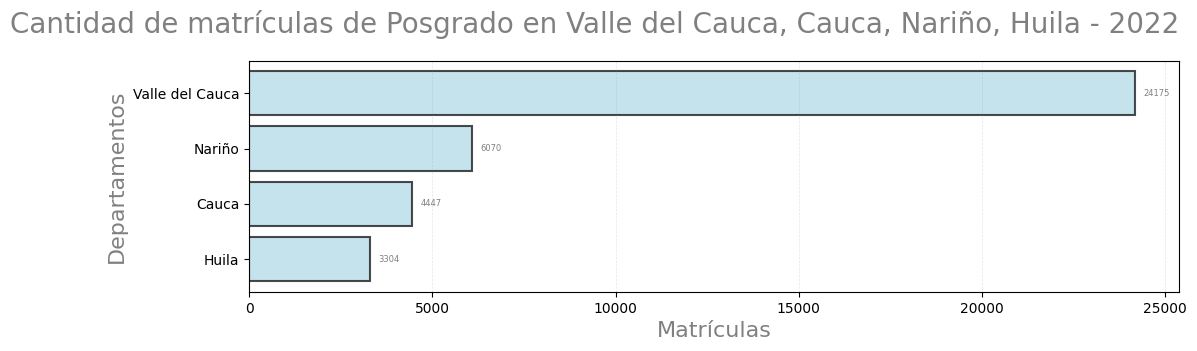

In [ ]:
# sort_values organiza | head toma los 20 primeros
lista_departamento_IES = df_suma_departamento_programa.sort_values(ascending=False).head(20) # DEPARTAMENTO DE OFERTA DEL PROGRAMA
# Separo los valores de la lista de nombres de las IES
departamentos_IES = lista_departamento_IES.keys()
# print(departamentos_IES) # prueba
valores_departamentos_IES = lista_departamento_IES.values
# print(valores_departamentos_IES) # prueba
# ******************************
# Creo objeto para crear gráfica
# ******************************
fig, ax =plt.subplots(figsize=(12, 3))# 12 inches wide, 3 inches tall
# configuración de los valores para el eje 'x' y el eje 'y', colores de las barras y grosor del delineado
hbars = ax.barh (departamentos_IES, valores_departamentos_IES, color='lightblue', edgecolor='black', linewidth=1.5, alpha=0.7)
# por alguna razón cambia el orden y hay que volver a cambiar el orden
ax.invert_yaxis()
# personalización de etiquetas, título, grilla y anotaciones
ax.set_xlabel('Matrículas', fontsize=16, color='grey') # detalles de etiqueta del eje 'x'
ax.set_ylabel('Departamentos', fontsize=16, color='grey') # detalles de etiqueta del eje 'y'
ax.set_title('Cantidad de matrículas de Posgrado en Valle del Cauca, Cauca, Nariño, Huila - 2022',
             loc='right', color='grey', fontsize=20, pad=20) # detalles del título
ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.5, alpha=0.2) # detalles de grilla
# configuración de anotaciones (valores al final de las barras)
ax.bar_label(hbars,labels=[f'{e}' for e in valores_departamentos_IES], color='grey', padding=6, fontsize=6)
# Presentación del objeto
plt.show()

Ahora veamos como da la gráfica con los municipios

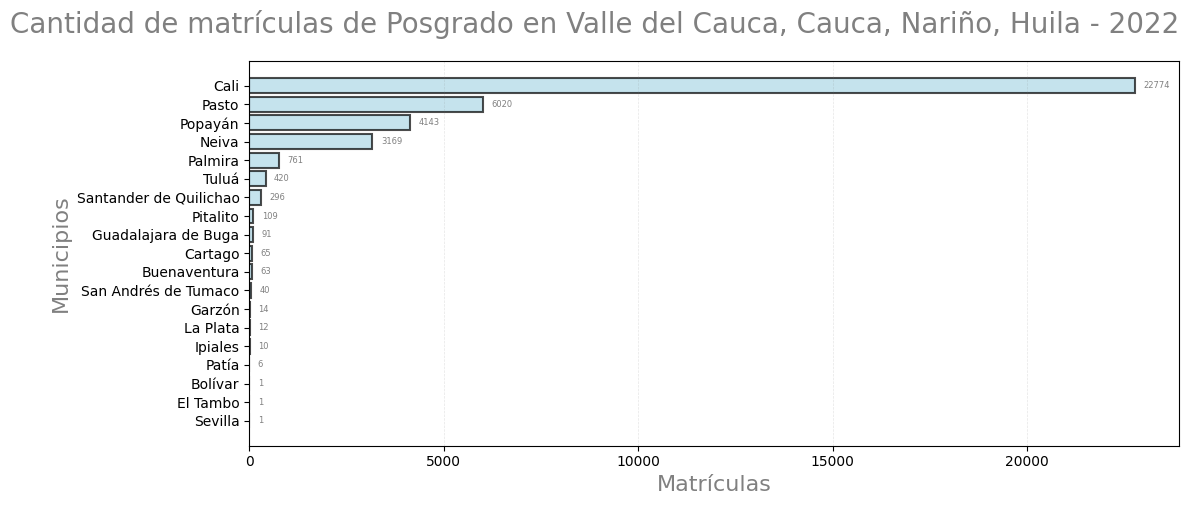

In [ ]:
# sort_values organiza | head toma los 20 primeros
lista_municipios_IES = df_suma_municipio_programa.sort_values(ascending=False).head(20) # MUNICIPIO DE OFERTA DEL PROGRAMA
# Separo los valores de la lista de nombres de las IES
municipios_IES = lista_municipios_IES.keys()
# print(municipios_IES) # prueba
valores_municipios_IES = lista_municipios_IES.values
# print(valores_municipios_IES) # prueba
# ******************************
# Creo objeto para crear gráfica
# ******************************
fig, ax =plt.subplots(figsize=(12, 5))# 12 inches wide, 5 inches tall
# configuración de los valores para el eje 'x' y el eje 'y', colores de las barras y grosor del delineado
hbars = ax.barh (municipios_IES, valores_municipios_IES, color='lightblue', edgecolor='black', linewidth=1.5, alpha=0.7)
# por alguna razón cambia el orden y hay que volver a cambiar el orden
ax.invert_yaxis()
# personalización de etiquetas, título, grilla y anotaciones
ax.set_xlabel('Matrículas', fontsize=16, color='grey') # detalles de etiqueta del eje 'x'
ax.set_ylabel('Municipios', fontsize=16, color='grey') # detalles de etiqueta del eje 'y'
ax.set_title('Cantidad de matrículas de Posgrado en Valle del Cauca, Cauca, Nariño, Huila - 2022',
             loc='right', color='grey', fontsize=20, pad=20) # detalles del título
ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.5, alpha=0.2) # detalles de grilla
# configuración de anotaciones (valores al final de las barras)
ax.bar_label(hbars,labels=[f'{e}' for e in valores_municipios_IES], color='grey', padding=6, fontsize=6)
# Presentación del objeto
plt.show()

## Propuesta para Refactorizar las gráficas

Al realizar las gráficas alcance a notar que solo es necesario cambiar algunas pocas cosas para repetir las gráficas.

- Obtener una lista con el dataframe agrupado (sea por nivel acadédico, departamento o municipio)
- Acomodar los nombres de las listas para que sean más coherentes los procesos internos (lista_municipios, valores_municipios | lista_departamentos, valores_departamentos).
- Títulos y etiquetas de las gráficas acordes a los datos a mostrar.  

## Análisis especifico de programas y áreas

Siguiendo con el análisis, genero una lista de los programas académicos con mayores matrículas para la región sur oeste del paíz. Recordemos que el dataframe con estos datos es **df_so_maestria**.

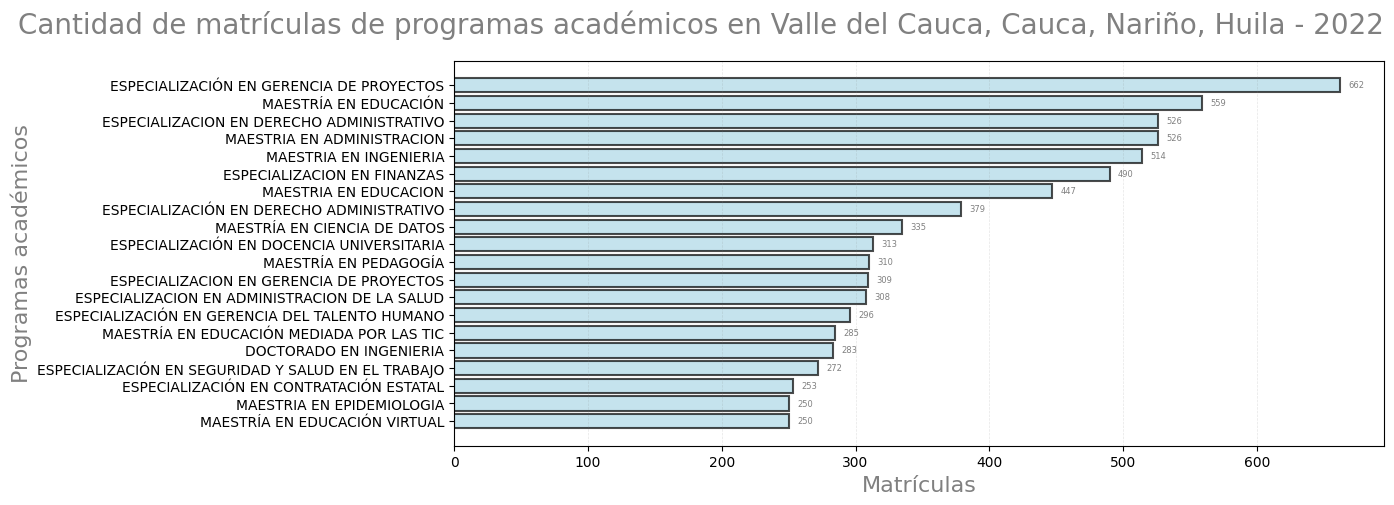

In [ ]:
# Creo una lista con los valores de las sumas de matrículas por programa académico
df_sum_programa_academico = df_so_maestria.groupby('PROGRAMA ACADÉMICO')['MATRICULADOS'].sum() # PROGRAMA ACADÉMICO

df_programa_academico = df_sum_programa_academico.sort_values(ascending=False).head(20)
# print(df_programa_academico)
lista_programa_academico_IES = df_programa_academico.keys()
# print(lista_programa_academico_IES) # prueba
valores_programa_academico = df_programa_academico.values
# print(valores_programa_academico) # prueba
# ******************************
# Creo objeto para crear gráfica
# ******************************
fig, ax =plt.subplots(figsize=(12, 5))# 12 inches wide, 5 inches tall
# configuración de los valores para el eje 'x' y el eje 'y', colores de las barras y grosor del delineado
hbars = ax.barh (lista_programa_academico_IES, valores_programa_academico, color='lightblue', edgecolor='black', linewidth=1.5, alpha=0.7)
# por alguna razón cambia el orden y hay que volver a cambiar el orden
ax.invert_yaxis()
# personalización de etiquetas, título, grilla y anotaciones
ax.set_xlabel('Matrículas', fontsize=16, color='grey') # detalles de etiqueta del eje 'x'
ax.set_ylabel('Programas académicos', fontsize=16, color='grey') # detalles de etiqueta del eje 'y'
ax.set_title('Cantidad de matrículas de programas académicos en Valle del Cauca, Cauca, Nariño, Huila - 2022',
             loc='right', color='grey', fontsize=20, pad=20) # detalles del título
ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.5, alpha=0.2) # detalles de grilla
# configuración de anotaciones (valores al final de las barras)
ax.bar_label(hbars,labels=[f'{e}' for e in valores_programa_academico], color='grey', padding=6, fontsize=6)
# Presentación del objeto
plt.show()

veamos por área de conocimiento

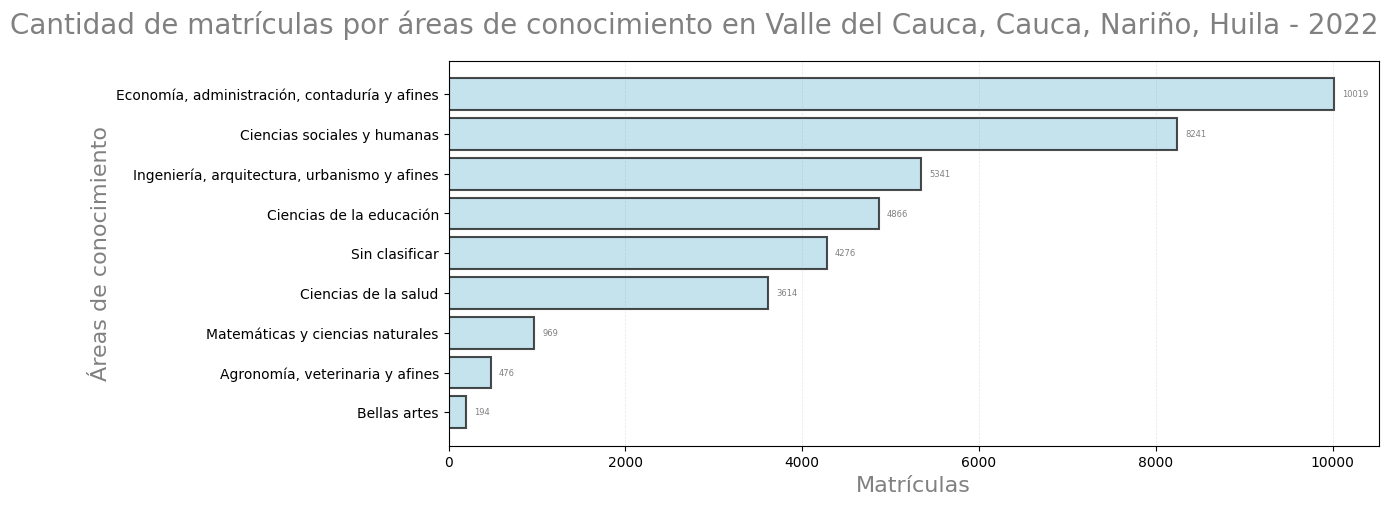

In [ ]:
df_sum_area_de_conocimiento = df_so_maestria.groupby('ÁREA DE CONOCIMIENTO')['MATRICULADOS'].sum() # ÁREA DE CONOCIMIENTO

df_area_de_conocimiento = df_sum_area_de_conocimiento.sort_values(ascending=False).head(20)
# print(df_area_de_conocimiento)
lista_area_de_conocimiento = df_area_de_conocimiento.keys()
# print(lista_area_de_conocimiento) # prueba
valores_area_de_conocimiento = df_area_de_conocimiento.values
# print(valores_area_de_conocimiento) # prueba
# ******************************
# Creo objeto para crear gráfica
# ******************************
fig, ax =plt.subplots(figsize=(12, 5))# 12 inches wide, 5 inches tall
# configuración de los valores para el eje 'x' y el eje 'y', colores de las barras y grosor del delineado
hbars = ax.barh (lista_area_de_conocimiento, valores_area_de_conocimiento, color='lightblue', edgecolor='black', linewidth=1.5, alpha=0.7)
# por alguna razón cambia el orden y hay que volver a cambiar el orden
ax.invert_yaxis()
# personalización de etiquetas, título, grilla y anotaciones
ax.set_xlabel('Matrículas', fontsize=16, color='grey') # detalles de etiqueta del eje 'x'
ax.set_ylabel('Áreas de conocimiento', fontsize=16, color='grey') # detalles de etiqueta del eje 'y'
ax.set_title('Cantidad de matrículas por áreas de conocimiento en Valle del Cauca, Cauca, Nariño, Huila - 2022',
             loc='right', color='grey', fontsize=20, pad=20) # detalles del título
ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.5, alpha=0.2) # detalles de grilla
# configuración de anotaciones (valores al final de las barras)
ax.bar_label(hbars,labels=[f'{e}' for e in valores_area_de_conocimiento], color='grey', padding=6, fontsize=6)
# Presentación del objeto
plt.show()

## Agrupando por semestre y programas

Para agrupar por dos criterios vamos a usar

In [ ]:
df_sum_area_de_conocimiento_y_semestre = df_so_maestria.groupby(['SEMESTRE','ÁREA DE CONOCIMIENTO'])['MATRICULADOS'].sum() # SEMESTRE y ÁREA DE CONOCIMIENTO
print(df_sum_area_de_conocimiento_y_semestre.head())

SEMESTRE  ÁREA DE CONOCIMIENTO           
1         Agronomía, veterinaria y afines     241
          Bellas artes                         90
          Ciencias de la educación           2406
          Ciencias de la salud               1822
          Ciencias sociales y humanas        4161
Name: MATRICULADOS, dtype: int64


### Usando `pprint` para el diccionario `df_sum_area_de_conocimiento_y_semestre`

`pprint` es ideal para imprimir diccionarios y listas de manera legible, mostrando su estructura anidada.

In [ ]:
from pprint import pprint

print("Estructura del diccionario `df_sum_area_de_conocimiento_y_semestre`:")
pprint(df_sum_area_de_conocimiento_y_semestre)

Estructura del diccionario `df_sum_area_de_conocimiento_y_semestre`:
SEMESTRE  ÁREA DE CONOCIMIENTO                         
1         Agronomía, veterinaria y afines                   241
          Bellas artes                                       90
          Ciencias de la educación                         2406
          Ciencias de la salud                             1822
          Ciencias sociales y humanas                      4161
          Economía, administración, contaduría y afines    4982
          Ingeniería, arquitectura, urbanismo y afines     2618
          Matemáticas y ciencias naturales                  499
          Sin clasificar                                   1758
2         Agronomía, veterinaria y afines                   235
          Bellas artes                                      104
          Ciencias de la educación                         2460
          Ciencias de la salud                             1792
          Ciencias sociales y humanas      

### Usando `df.info()` y `df.dtypes` para el DataFrame `df_sin_duplicados`

Para DataFrames, `info()` te dará un resumen conciso de todas las columnas, sus tipos de datos no nulos y el uso de memoria, mientras que `dtypes` solo te mostrará los tipos de datos.

In [ ]:
print("Estructura e información del DataFrame `df_sin_duplicados` usando `info()`:")
df_sin_duplicados.info()

print("\nTipos de datos del DataFrame `df_sin_duplicados` usando `dtypes`:")
print(df_sin_duplicados.dtypes)

Si estás buscando visualizar la estructura de un objeto de Python más genérico (no necesariamente un diccionario o un DataFrame), o si tienes un objeto personalizado y quieres ver sus atributos de forma jerárquica, por favor házmelo saber y puedo crear una función personalizada para eso.